## This Jupyter Notebook serves as a demo Workflow of cleaning and exploring IgE measurements with Pax for an allergen panel involve testing blood samples to detect Immunoglobulin E (IgE) antibody levels against specific allergens using the Pax system.

Fill in the empty code cells below. Feel free to add more code cells if needed.

### Data upload:
- Use the upload button on the left to upload the file: 'PAX_Data.xlsx'
- By default the data should have been upload to into the folder '/content'

## Load the required modules
- Just run the following code-cell to load all modules needed for this exercise

In [92]:
import os
import pandas as pd
import numpy as np

### Checking the working directory:
- use 'os.getcwd()' method to check for the current working directory.
- If you are using Google Colab, the default working directory should be the folder 'content'
- If not, use the 'os. chdir(<path>)' method to make sure to set the working directory

In [93]:
os.getcwd()

'/content'

## Read the excel file
- if you are not using Google Colab, make sure to set the path to your data file correctly: \'<FILE-PATH\>/PAX_Data.xlsx'
- use: 'Sheet1' as sheet_name
- ignore the header: header=None
- assign the loaded data to a variable called: df


In [94]:
df = pd.read_excel("PAX_Data.xlsx", sheet_name = "Sheet1", header =None)
print

<function print>

### Print the 'shape' of the dataframe

In [95]:
df.shape

(250, 6616)

### Print the number of rows:

In [96]:
df.count()

0       250
1       250
2       250
3       250
4       250
       ... 
6611    250
6612    250
6613    250
6614    250
6615    250
Length: 6616, dtype: int64

### Use the 'head' method to have a look at the first 10 rows of the table

In [97]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
0,Date of test,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,2023-04-13,...,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30,2023-06-30
1,Test number,2334000487D,2331000683D,2331000884D,2331000880D,2331000851D,2331001025D,2331000881D,2331000879D,2344000227D,...,2334002233D,2348000664D,2331003597D,2331003185D,2331003447D,2334002232D,2344000712D,2331003547D,2344000711D,2334002236D
2,Country,Spain,Netherland,Germany,Germany,Netherland,Sweden,Germany,Germany,UK,...,Slovenia,Poland,Belgium,Norway,Netherland,Slovenia,UK,Netherland,UK,Spain
3,Age Y/M,3Years 11Months,2Years 8Months,2Years 8Months,7Years 9Months,11Years 11Months,4Years 8Months,1Years 9Months,6Years 9Months,3Years 8Months,...,8Years 8Months,3Years 7Months,3Years 7Months,1Years 5Months,1Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months
4,Sex,Female,Male,Male,Female,Male,Female,Male,Female,Female,...,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male
5,Cyn d,18.5,19.67,20.11,18.09,17.92,17.78,18.64,21.3,20.5,...,16.33,17.18,15.48,15.79,18.64,17.44,17.05,18.42,19.03,16.73
6,rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
7,Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
8,Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
9,rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96


### Splitting the Data:
- As you can see, row 0 to 4 contains the metadata of the experiment
- Row 5 to end contains the measured expression data of Allergens

Now, we need to split the data into:
- Metadata and
- Expression data

Check the documentation of the pandas method 'iloc'
- Split the data, row 0 to 4 and assing it to a variable called: md
- From row 5 to end, assing the expression data to a variable called: expr

In [98]:
df_md = df.iloc[:5,:]

In [99]:
df_expr = df.iloc[5:,:]
print("Shape of new dataframes - {} , {}".format(df_md.shape, df_expr.shape))

Shape of new dataframes - (5, 6616) , (245, 6616)


### Print the 'shape' of each new table

In [100]:
df_md.shape

(5, 6616)

In [101]:

df_expr.shape

(245, 6616)

### Use the 'head' method to inspect the expr table


In [102]:
df_expr.head(10)

,0,1,2,3,4,5,6,7,8,9,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
5,Cyn d,18.5,19.67,20.11,18.09,17.92,17.78,18.64,21.3,20.5,...,16.33,17.18,15.48,15.79,18.64,17.44,17.05,18.42,19.03,16.73
6,rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
7,Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
8,Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
9,rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96
10,Pas n,21.17,22.28,21.03,21.77,20.55,19.32,30.85,23.31,20.62,...,21.95,22.21,19.55,21.57,18.23,19.71,21.6,20.64,18.91,18.46
11,rPhl p 1,21.77,22.96,21.61,21.55,20.79,22.83,24.76,26.11,21.89,...,21.16,21.13,22.19,20.32,23,20.39,20.86,20.56,20.19,19.3
12,rPhl p 2,19.92,19.45,21.01,19.59,20.08,16.71,20.64,21.75,19.86,...,20.09,18.35,19.01,19.72,19.71,18.6,17.59,19.58,19.38,18.01
13,rPhl p 5.0101,21.79,19.07,20.15,19.72,23.4,19.61,23.81,21.44,18.77,...,19.72,19.68,21.86,19.21,47.15,19.98,22.94,19.48,21.48,20.64
14,rPhl p 6,22.25,20.69,23.09,19.94,19.59,18.8,23.23,21.69,18.37,...,20.43,18.33,19.35,19.79,20.39,19.94,19.59,24.45,19.06,20.69


As you can see column 0 contains the name of the Allergens

- Set the Allergen names as the index of the table (similar to rownames in R)example:   'expr.index = ...'
- 'drop' the column 0 and override the current variable

In [189]:
expr = df_expr.set_index(df_expr.columns[0])
display(expr)

,1,2,3,4,5,6,7,8,9,10,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
0,,,,,,,,,,,,,,,,,,,,,
Cyn d,18.5,19.67,20.11,18.09,17.92,17.78,18.64,21.3,20.5,17.64,...,16.33,17.18,15.48,15.79,18.64,17.44,17.05,18.42,19.03,16.73
rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,22.32,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,19.35,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,22.08,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,22.06,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sola t,22.05,22.33,22.33,21.61,21.85,20.94,19.71,21.27,18.76,18.76,...,20.05,21.44,21.6,18.46,19.28,19.28,20.99,19.42,19.89,18.79
rSola t 2,22.36,24.08,24.08,16.39,16.83,30.73,18.29,19.2,18.89,18.89,...,17.37,19.06,19.1,18.23,16.97,16.97,19.72,19.35,17.84,16.53
rSola t_GBSSI,23.43,24.02,24.02,19.78,20.01,24.56,23.26,21.62,21.01,21.01,...,21.38,20.4,20.35,21.23,20.13,20.13,21.65,21.24,20.97,19.07


### Cleaning the Metadata
- Use 'head' to look into the metadata
Note that we want to use the rows as columns, therefore:
- Transpose the metadata
- Change the table: row 0 should be the column names

In [120]:
df_md.head(10)

,0,1,2,3,4
0,Date of test,Test number,Country,Age Y/M,Sex
1,2023-04-13,2334000487D,Spain,3Years 11Months,Female
2,2023-04-13,2331000683D,Netherland,2Years 8Months,Male
3,2023-04-13,2331000884D,Germany,2Years 8Months,Male
4,2023-04-13,2331000880D,Germany,7Years 9Months,Female
5,2023-04-13,2331000851D,Netherland,11Years 11Months,Male
6,2023-04-13,2331001025D,Sweden,4Years 8Months,Female
7,2023-04-13,2331000881D,Germany,1Years 9Months,Male
8,2023-04-13,2331000879D,Germany,6Years 9Months,Female
9,2023-04-13,2344000227D,UK,3Years 8Months,Female


In [128]:
df_md = df_md.transpose()
print(df_md)

                 0            1           2                3       4
0     Date of test  Test number     Country          Age Y/M     Sex
1       2023-04-13  2334000487D       Spain  3Years 11Months  Female
2       2023-04-13  2331000683D  Netherland   2Years 8Months    Male
3       2023-04-13  2331000884D     Germany   2Years 8Months    Male
4       2023-04-13  2331000880D     Germany   7Years 9Months  Female
...            ...          ...         ...              ...     ...
6611    2023-06-30  2334002232D    Slovenia   2Years 5Months    Male
6612    2023-06-30  2344000712D          UK   2Years 5Months    Male
6613    2023-06-30  2331003547D  Netherland   2Years 5Months    Male
6614    2023-06-30  2344000711D          UK   2Years 5Months    Male
6615    2023-06-30  2334002236D       Spain   2Years 5Months    Male

[6616 rows x 5 columns]


In [129]:
md=df_md.rename(columns=df_md.iloc[0])
print(md)

      Date of test  Test number     Country          Age Y/M     Sex
0     Date of test  Test number     Country          Age Y/M     Sex
1       2023-04-13  2334000487D       Spain  3Years 11Months  Female
2       2023-04-13  2331000683D  Netherland   2Years 8Months    Male
3       2023-04-13  2331000884D     Germany   2Years 8Months    Male
4       2023-04-13  2331000880D     Germany   7Years 9Months  Female
...            ...          ...         ...              ...     ...
6611    2023-06-30  2334002232D    Slovenia   2Years 5Months    Male
6612    2023-06-30  2344000712D          UK   2Years 5Months    Male
6613    2023-06-30  2331003547D  Netherland   2Years 5Months    Male
6614    2023-06-30  2344000711D          UK   2Years 5Months    Male
6615    2023-06-30  2334002236D       Spain   2Years 5Months    Male

[6616 rows x 5 columns]


- Make sure to remove the first row, which now has become the column names

In [130]:
md = md.iloc[1: , :]

### Use 'head' to inspect your table and make sure it looks as below:

	Date of test Test number	Country	Age Y/M**

1	2023-04-13	2334000487D	Spain	3Years 11Months

2	2023-04-13	2331000683D	Netherland	2Years 8Months

3	2023-04-13	2331000884D	Germany	2Years 8Months

4	2023-04-13	2331000880D	Germany	7Years 9Months

5	2023-04-13	2331000851D	Netherland	11Years 11Months

In [131]:
md.head(10)

,Date of test,Test number,Country,Age Y/M,Sex
1,2023-04-13,2334000487D,Spain,3Years 11Months,Female
2,2023-04-13,2331000683D,Netherland,2Years 8Months,Male
3,2023-04-13,2331000884D,Germany,2Years 8Months,Male
4,2023-04-13,2331000880D,Germany,7Years 9Months,Female
5,2023-04-13,2331000851D,Netherland,11Years 11Months,Male
6,2023-04-13,2331001025D,Sweden,4Years 8Months,Female
7,2023-04-13,2331000881D,Germany,1Years 9Months,Male
8,2023-04-13,2331000879D,Germany,6Years 9Months,Female
9,2023-04-13,2344000227D,UK,3Years 8Months,Female
10,2023-04-13,2334000522D,Italy,3Years 8Months,Female


### Rename the Metadata columns
- rename the columns 'Date of test' to 'Date', 'Test number' to 'TestID' and 'Age Y/M' to 'Age (M)'

In [132]:
md = md.rename(columns={"Date if test": "Date", "Test number": "TestID", "Age Y/M": "Age (M)"})
md.head(5)

,Date of test,TestID,Country,Age (M),Sex
1,2023-04-13,2334000487D,Spain,3Years 11Months,Female
2,2023-04-13,2331000683D,Netherland,2Years 8Months,Male
3,2023-04-13,2331000884D,Germany,2Years 8Months,Male
4,2023-04-13,2331000880D,Germany,7Years 9Months,Female
5,2023-04-13,2331000851D,Netherland,11Years 11Months,Male


### Convert the Age column
The function below converts a string into a number of total month e.g.:

"2Years 8Months" convert to 32.0

- use the below function to convert each 'string' from the Age column into a number (float)
- Hint: check the function '.apply(convert_to_month)' which works on a dataframe column

In [117]:
import re

def convert_to_months(duration_str):
        # Check for missing or empty entries
    if pd.isnull(duration_str) or duration_str.strip() == "":
        return None


    # Regular expression to find years and months in the input string
    year_pattern = re.compile(r"(\d+)\s*Years?")
    month_pattern = re.compile(r"(\d+)\s*Months?")

    # Search for years and months in the input string
    years_match = year_pattern.search(duration_str)
    months_match = month_pattern.search(duration_str)

    # Extract years and months from the matches
    years = int(years_match.group(1)) if years_match else 0
    months = int(months_match.group(1)) if months_match else 0

    # Convert years to months and add to months
    total_months = (years * 12) + months

    return int(total_months)


In [148]:
# convert md['Age (M)'] to number
# write your code here:

md_age = md['Age (M)'].apply(convert_to_months)


In [150]:
md['Age (M)'] = md_age.values

Check the result with 'head'

In [151]:
md.head(5)

,Date of test,TestID,Country,Age (M),Sex
1,2023-04-13,2334000487D,Spain,47.0,Female
2,2023-04-13,2331000683D,Netherland,32.0,Male
3,2023-04-13,2331000884D,Germany,32.0,Male
4,2023-04-13,2331000880D,Germany,93.0,Female
5,2023-04-13,2331000851D,Netherland,143.0,Male


### Rename the columns of expr
- use the Test Number from md['Test number'] as new column names for the expr data

In [155]:
extracted_col = md["TestID"]
print("Column to be added from the first DataFrame to the second DataFrame:")
display(extracted_col)

Column to be added from the first DataFrame to the second DataFrame:


1       2334000487D
2       2331000683D
3       2331000884D
4       2331000880D
5       2331000851D
           ...     
6611    2334002232D
6612    2344000712D
6613    2331003547D
6614    2344000711D
6615    2334002236D
Name: TestID, Length: 6615, dtype: object

In [192]:
expr.rename(index=str, columns=extracted_col)



,2334000487D,2331000683D,2331000884D,2331000880D,2331000851D,2331001025D,2331000881D,2331000879D,2344000227D,2334000522D,...,2334002233D,2348000664D,2331003597D,2331003185D,2331003447D,2334002232D,2344000712D,2331003547D,2344000711D,2334002236D
0,,,,,,,,,,,,,,,,,,,,,
Cyn d,18.5,19.67,20.11,18.09,17.92,17.78,18.64,21.3,20.5,17.64,...,16.33,17.18,15.48,15.79,18.64,17.44,17.05,18.42,19.03,16.73
rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,22.32,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,19.35,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,22.08,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,22.06,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sola t,22.05,22.33,22.33,21.61,21.85,20.94,19.71,21.27,18.76,18.76,...,20.05,21.44,21.6,18.46,19.28,19.28,20.99,19.42,19.89,18.79
rSola t 2,22.36,24.08,24.08,16.39,16.83,30.73,18.29,19.2,18.89,18.89,...,17.37,19.06,19.1,18.23,16.97,16.97,19.72,19.35,17.84,16.53
rSola t_GBSSI,23.43,24.02,24.02,19.78,20.01,24.56,23.26,21.62,21.01,21.01,...,21.38,20.4,20.35,21.23,20.13,20.13,21.65,21.24,20.97,19.07


### Print the shapes of both tables
- check if the number of columns in expr matches the number of rows in md

### Dropping duplicates and keep='first'

In [195]:
# This function can be use to inspect if there a duplictes within a column
md['TestID'].duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
6611    False
6612    False
6613     True
6614    False
6615    False
Name: TestID, Length: 6615, dtype: bool

In [199]:
# remove duplicate values in TestID column
# Hint: check the function: 'drop_duplicates'
# Hint: use the parameter 'keep='first'' to keep the first occurance and remove following duplicates
md.drop_duplicates(keep='first')


,Date of test,TestID,Country,Age (M),Sex
1,2023-04-13,2334000487D,Spain,47.0,Female
2,2023-04-13,2331000683D,Netherland,32.0,Male
3,2023-04-13,2331000884D,Germany,32.0,Male
4,2023-04-13,2331000880D,Germany,93.0,Female
5,2023-04-13,2331000851D,Netherland,143.0,Male
...,...,...,...,...,...
6611,2023-06-30,2334002232D,Slovenia,29.0,Male
6612,2023-06-30,2344000712D,UK,29.0,Male
6613,2023-06-30,2331003547D,Netherland,29.0,Male
6614,2023-06-30,2344000711D,UK,29.0,Male


### Don't forget to drop the duplicates on the expression data as well:

In [201]:
# example:

# df = df.loc[:, ~df.columns.duplicated()]

# where df.columns.duplicated(): returns a boolean array of duplicates
# ~ negates the boolean values: True is False and False is True
expr = expr.loc[:, ~expr.columns.duplicated()]
expr.drop_duplicates(keep='first')

,1,2,3,4,5,6,7,8,9,10,...,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615
0,,,,,,,,,,,,,,,,,,,,,
Cyn d,18.5,19.67,20.11,18.09,17.92,17.78,18.64,21.3,20.5,17.64,...,16.33,17.18,15.48,15.79,18.64,17.44,17.05,18.42,19.03,16.73
rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,22.32,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,19.35,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,22.08,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,22.06,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sola t,22.05,22.33,22.33,21.61,21.85,20.94,19.71,21.27,18.76,18.76,...,20.05,21.44,21.6,18.46,19.28,19.28,20.99,19.42,19.89,18.79
rSola t 2,22.36,24.08,24.08,16.39,16.83,30.73,18.29,19.2,18.89,18.89,...,17.37,19.06,19.1,18.23,16.97,16.97,19.72,19.35,17.84,16.53
rSola t_GBSSI,23.43,24.02,24.02,19.78,20.01,24.56,23.26,21.62,21.01,21.01,...,21.38,20.4,20.35,21.23,20.13,20.13,21.65,21.24,20.97,19.07


### Print the shapes of both table and make sure the number of rows in md and the number of columns in expr are matching

### Saving the DATA
After initial cleaning, let's save the data in its current form:
- save both tables as csv file in the current directory

In [205]:
md.to_csv(os.getcwd() + r'\NI2\md.csv')
expr.to_csv(os.getcwd() + r'\NI2\expr.csv')

### Subsetting the data
- subset the metadata and expression data to county = 'Spain'

Hint: use the TestID on the filtered data to subset on the expression data

In [206]:
md_spain = md.loc[md.Country == 'Spain', :]

testIdSpain = md.TestID[md.Country == 'Spain']

- Print the shapes to check the result

In [207]:
md_spain.shape

(626, 5)

# Exploration of the expression data
To gain an initial understanding of the expression data, we need to filter out the noise. Currently, noise is defined as values below 30.

- Convert the expr dataframe into a numpy array
- Set values below 30 to 0.0

Remove rows were all values are 0
- use the 'sum' method (axsis = 1) to the the sums of each row
- use this rowsum values to subset the array

In [227]:
# Convert to numpy
my_array = expr.to_numpy()

In [232]:
# Set values below 30 to 0
# Hint:
# 'my_array < value' will return a boolean array which can be used
my_array[my_array < 30.] = 0

In [238]:
# Calculate row sums
sum_row = my_array.sum(axis=0)

# Filter rows where the sum is not 0

data = sum_row[~np.all(sum_row == 0, axis=0)]
print (data)

[[0 32.63 34.59 ... 206.21 125.56 0]]


### Visualize the Expression Data

The follwing code is provided. Just make sure you replace the names of the variables with your variable names.

In [239]:
import seaborn as sns
# import pandas as pd
from sklearn.cluster import KMeans  # Example clustering algorithm
from sklearn.preprocessing import StandardScaler

In [240]:
# Standardize data (optional)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) # use the name of your array

ValueError: The number of observations cannot be determined on an empty distance matrix.

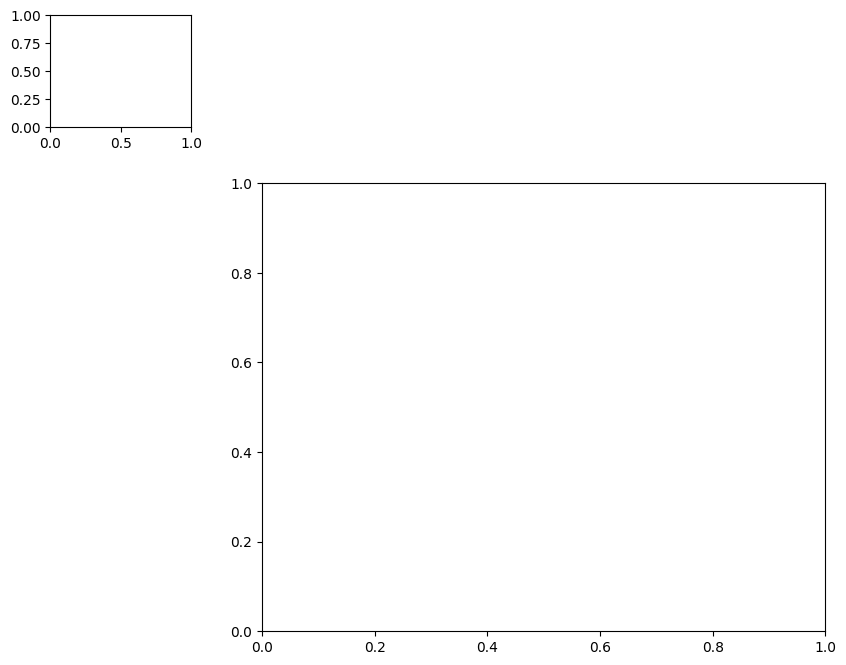

In [241]:
# Create the clustermap with hierarchical clustering
sns.clustermap(scaled_data,
               method='ward',  # Linkage method (ward, single, complete, average, etc.)
               metric='euclidean',  # Distance metric (euclidean, cityblock, etc.)
               cmap="YlGnBu",       # Colormap
               figsize=(10, 8))    # Figure size

### Right click the plot and save the heatmap as image

# Done. Congratulations!